In [1]:
# importação/obtenção dos dados
import pandas as pd
df = pd.read_csv("advertising.csv")
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [2]:
# limpeza de dados (nesse exeplo não foi necessária limpeza)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


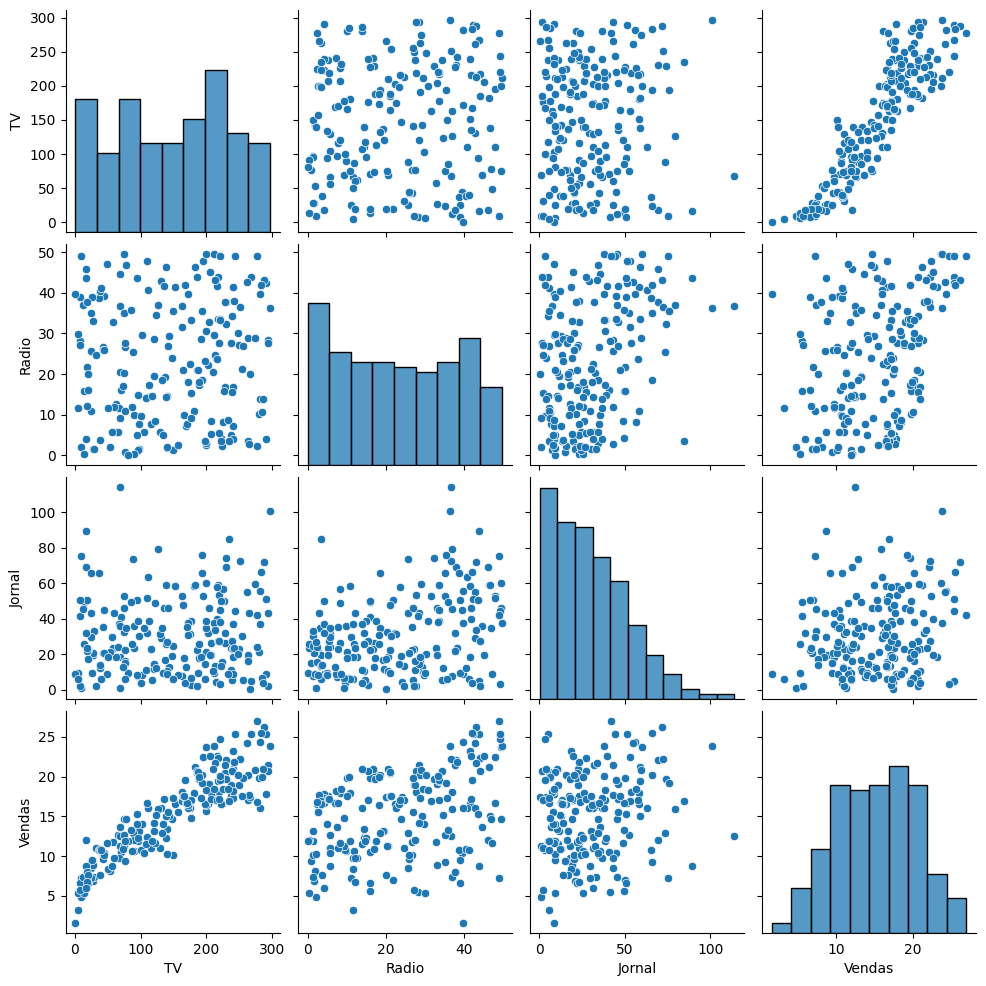

In [5]:
# análise exploratória
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()


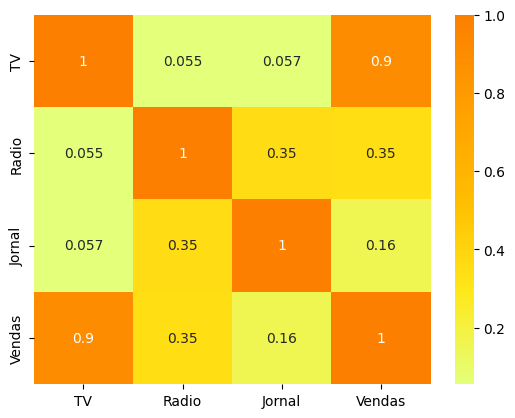

In [6]:
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.show()

In [15]:
# modelagem de algoritmos (fiz pip install -U scikit-learn)
from sklearn.model_selection import train_test_split

x = df.drop('Vendas', axis=1)
y = df['Vendas']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# treino IA
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

# teste IA
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

# indicadores da qualidade do teste
r2_lin = metrics.r2_score(y_test, test_pred_lin)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))
print(f"R² da Regressão Linear: {r2_lin}")
print(f"RSME da Regressão Linear: {rmse_lin}")
r2_rf = metrics.r2_score(y_test, test_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))
print(f"R² do Random Forest: {r2_rf}")
print(f"RSME do Random Forest: {rmse_rf}")

      



R² da Regressão Linear: 0.9071151423684273
RSME da Regressão Linear: 1.5396947656031237
R² do Random Forest: 0.9651161606003575
RSME do Random Forest: 0.9435704089609148


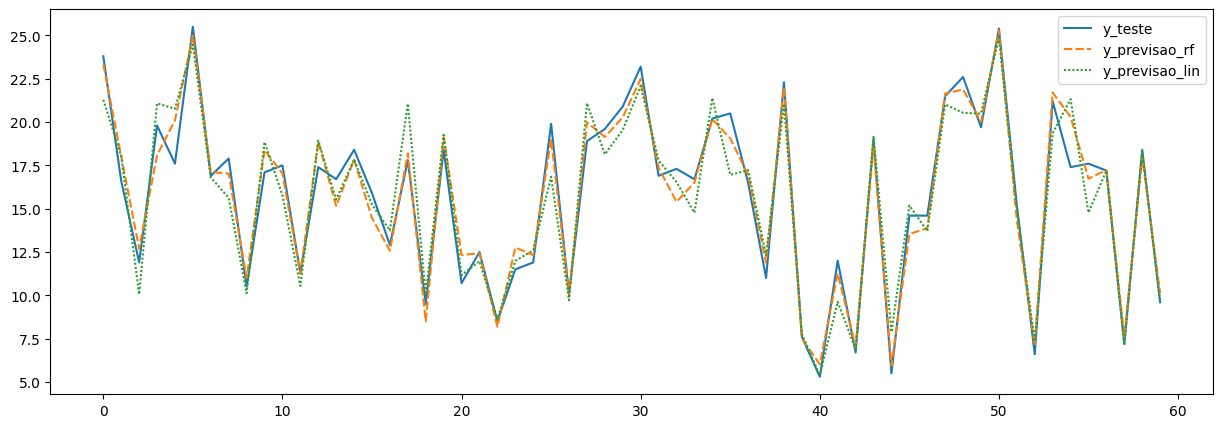

,y_teste,y_previsao_rf,y_previsao_lin
0,23.8,23.335,21.288161
1,16.6,18.027,18.042132
2,11.9,12.695,10.059590
3,19.8,18.087,21.082241
4,17.6,20.104,20.764760
5,25.5,25.000,24.471874
6,16.9,17.110,16.806436
7,17.9,17.031,15.628857
8,10.5,11.011,10.124799
9,17.1,18.387,18.846019


In [16]:
df_resultado = pd.DataFrame()
df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado = df_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

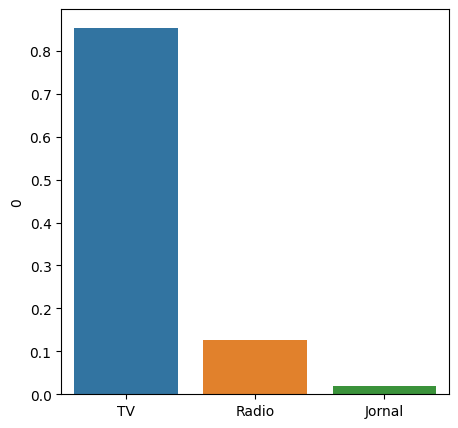

In [17]:
# importancia de cada item do x para a previsão
importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
plt.figure(figsize=(5, 5))
sns.barplot(x=importancia_features.index, y=importancia_features[0])
plt.show()

